# SALARY PREDICTION USING LINEAR REGRESSION

The Salary Prediction using Linear Regression project aims to build a predictive model to estimate an individual's salary based on various factors. In this project, the dependent variable (target) is the Salary, which want to predict. The independent variables (features) include Years of Experience, Education Level, and Job Role, which serve as inputs to the model. By applying Linear Regression, this project demonstrates how machine learning techniques can be utilized to analyze and predict salary trends, aiding in informed decision-making for employers and job seekers.

#### Importing dataset and libraries

In [4]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df=pd.read_csv(r"E:\data_analytics\ml_works\machine_learning_projects\salary_prediction_updated_dataset.csv")
df.head(2)

,YearsExperience,Education Level,Job Role,Salary
0,14.98,PhD,Marketing Specialist,77861.24
1,38.03,PhD,Software Engineer,166880.38


#### Information about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   YearsExperience  100000 non-null  float64
 1   Education Level  100000 non-null  object 
 2   Job Role         100000 non-null  object 
 3   Salary           100000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.1+ MB


#### Finding null values

In [6]:
df.isna().sum()

YearsExperience    0
Education Level    0
Job Role           0
Salary             0
dtype: int64

#### Removing Duplicates

In [7]:
#remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

#### Removing space in column name

In [8]:
#replacing space
df.columns=df.columns.str.replace(" ","_")
print(df.columns)

Index(['YearsExperience', 'Education_Level', 'Job_Role', 'Salary'], dtype='object')


#### Finding Unique Values

In [9]:
print(df['Education_Level'].unique())
print(df['Job_Role'].unique())

['PhD' "Bachelor's" "Master's" 'High School' 'Associate Degree']
['Marketing Specialist' 'Software Engineer' 'Business Analyst'
 'Product Manager' 'Data Scientist']


#### Encoding Categorical Values

In [10]:
#converting categorical data in to numerical data
le=LabelEncoder()
df['Education_Level']=le.fit_transform(df['Education_Level'])
df['Job_Role']=le.fit_transform(df['Job_Role'])
df.head(10)

,YearsExperience,Education_Level,Job_Role,Salary
0,14.98,4,2,77861.24
1,38.03,4,4,166880.38
2,29.28,1,0,123573.27
3,23.95,3,2,90155.08
4,6.24,3,0,55931.41
5,6.24,2,3,43277.27
6,2.32,1,3,39402.56
7,34.65,3,3,151385.44
8,24.04,3,1,117300.92
9,28.32,4,0,109221.28


#### Finding correlation

In [11]:
corr_matrix=df.corr(numeric_only=True)
print(corr_matrix)

                 YearsExperience  Education_Level  Job_Role    Salary
YearsExperience         1.000000         0.005700 -0.003044  0.982732
Education_Level         0.005700         1.000000 -0.001403  0.005029
Job_Role               -0.003044        -0.001403  1.000000 -0.018415
Salary                  0.982732         0.005029 -0.018415  1.000000


#### Heatmap plot

<Axes: >

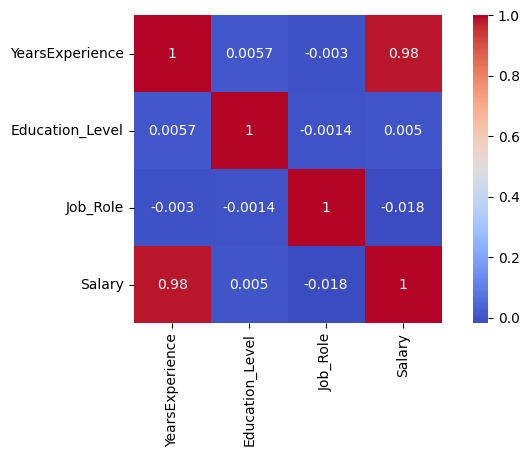

In [20]:
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)

#### Scatter plot

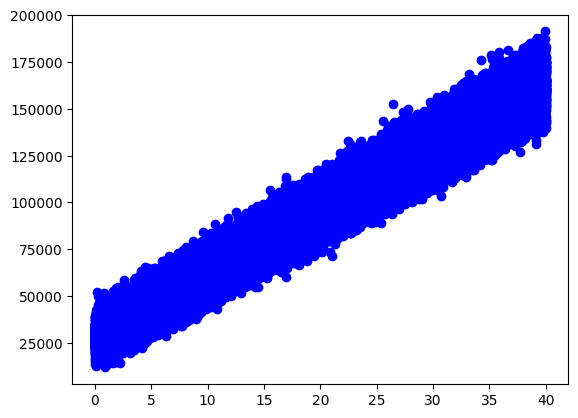

In [13]:
plt.scatter(df['YearsExperience'],df['Salary'],color='blue')
plt.show()

#### Dependent and Independent Variables

In [14]:
x=df.iloc[:,0:3].values
x=pd.DataFrame(x)
print(x)
y=df.iloc[:,3].values
y=pd.DataFrame(y)
print(y)

           0    1    2
0      14.98  4.0  2.0
1      38.03  4.0  4.0
2      29.28  1.0  0.0
3      23.95  3.0  2.0
4       6.24  3.0  0.0
...      ...  ...  ...
99995  31.69  2.0  1.0
99996  31.17  2.0  2.0
99997  26.98  0.0  0.0
99998  19.98  3.0  1.0
99999  15.60  3.0  4.0

[100000 rows x 3 columns]
               0
0       77861.24
1      166880.38
2      123573.27
3       90155.08
4       55931.41
...          ...
99995  147608.78
99996  117267.24
99997  118188.50
99998  108768.46
99999   85079.54

[100000 rows x 1 columns]


#### Splitting variable to test and train

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

LinearRegression()

#### Model Fitting

In [ ]:
model=LinearRegression()
model.fit(x_test,y_test)

#### Model Prediction

In [16]:
y_pred=model.predict(x_test)
print(y_test)
print(y_pred)

               0
75721   58230.84
80184   31491.88
19864  134206.07
76699  147421.23
92991   61066.25
...          ...
32595  141632.55
29313   68689.26
37862  116781.63
53421   83195.54
42410  119547.50

[20000 rows x 1 columns]
[[ 60029.57352176]
 [ 35662.86883997]
 [131688.65531557]
 ...
 [115160.06080498]
 [ 89854.86775116]
 [118604.59242751]]


#### Evaluating Model Performance

In [17]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 5822.112211188203
mean squared error: 53190822.862945125
root mean squared error: 7293.203881898896


#### Prediction Accuracy

In [18]:
score=metrics.r2_score(y_test,y_pred)
print("r2 score is:",score*100,"%")

r2 score is: 96.5865147276123 %


Conclusion:
The Salary Prediction using Linear Regression model achieved an impressive R² score of 96.59%, indicating a strong correlation between the predicted and actual salary values. The Mean Absolute Error (MAE) of 5822.11, Mean Squared Error (MSE) of 53190822.87, and Root Mean Squared Error (RMSE) of 7293.20 reflect the model's prediction accuracy. The high R² score demonstrates that the model can effectively predict salaries based on the provided features, showcasing its potential for practical applications in salary forecasting and human resource analytics.